In [1]:
!pip install rasterio

In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

# SELECCION DE VARIABLES

## Pendiente:

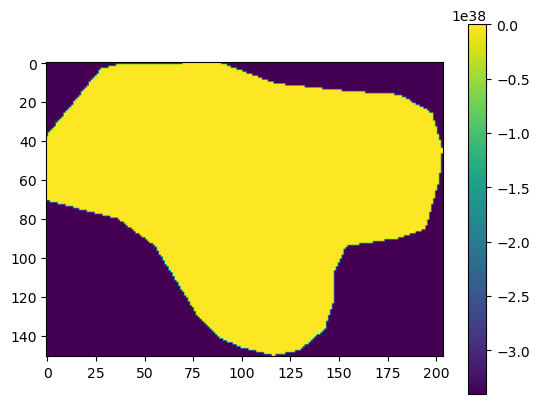

In [3]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

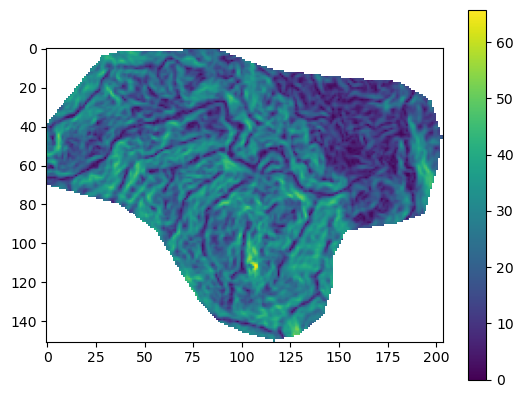

In [4]:
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();

In [5]:
type(pendiente)

numpy.ndarray

In [6]:
np.shape(pendiente)

(151, 204)

In [7]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(19705,)

## Aspecto:

(19705,)

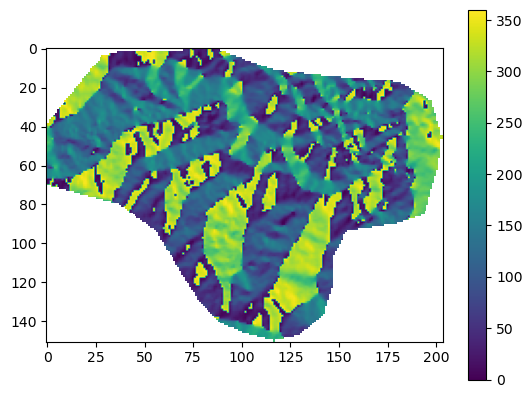

In [8]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

In [9]:
np.shape(aspecto)

(151, 204)

## Curvatura:

(10037,)

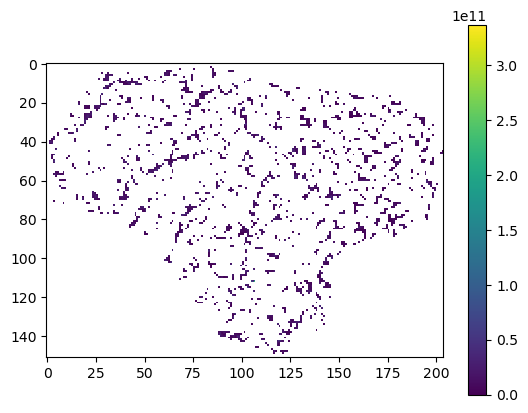

In [10]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/CURV_21.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-100,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura_vector_MenM.shape

# Cobertura:

(19705,)

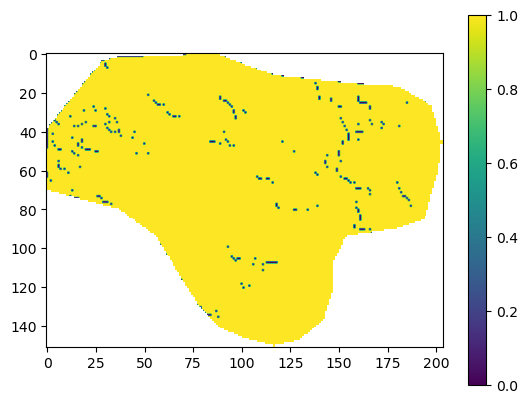

In [11]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Cobert_final1.tif?raw=true')
cobertura=raster.read(1)
cobertura=np.where(cobertura>=3,np.nan,cobertura)
cobertura_vector=cobertura.ravel()
cobertura_vector_MenM=cobertura_vector[~np.isnan(cobertura_vector)]
plt.imshow(cobertura)
plt.colorbar()
cobertura_vector_MenM.shape

# Geologia

(30804,)

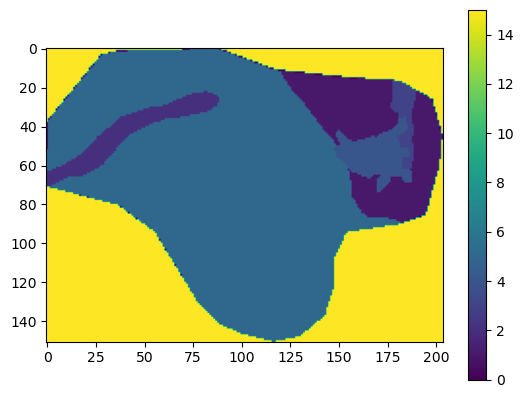

In [22]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Geo_superf1.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia<-100,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [ ]:
np.unique(geologia)

# Elevacion:


In [ ]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/elev_final1.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<0,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

# Inventario:

In [ ]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario>=3,np.nan,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

# DataFrame

In [ ]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk * inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [ ]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'elevacion': elevacion_vector_MenM, 'cobertura':cobertura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

In [ ]:
resumen=df1.describe().T
print(resumen)

In [ ]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

# Analisis univariado

In [ ]:
sns.pairplot(df1, hue='inventario');

In [ ]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

In [ ]:
df.pendiente.hist()
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

In [ ]:
df.aspecto.hist()
plt.title('Histograma de Aspecto')
plt.xlabel('Aspecto')
plt.ylabel('Frecuencia')

In [ ]:
df.elevacion.hist()
plt.title('Histograma de elevacion')
plt.xlabel('elevacion')
plt.ylabel('Frecuencia')

In [ ]:
df.cobertura.hist()
plt.title('Histograma de cobertura')
plt.xlabel('cobertura')
plt.ylabel('Frecuencia')

In [ ]:
plt.boxplot(df['pendiente']);

In [ ]:
plt.boxplot(df['aspecto']);

In [ ]:
plt.boxplot(df['elevacion']);

In [ ]:
plt.boxplot(df['cobertura']);

In [ ]:
sns.boxplot(x='pendiente', data=df);

In [ ]:
sns.boxplot(x='aspecto', data=df);

In [ ]:
sns.boxplot(x='elevacion', data=df);

In [ ]:
sns.boxplot(x='cobertura', data=df);

In [ ]:
sns.violinplot(df['pendiente']);

In [ ]:
sns.violinplot(df['aspecto']);

In [ ]:
sns.violinplot(df['elevacion']);

In [ ]:
sns.violinplot(df['cobertura']);

# Analisis multivariado

In [ ]:
sns.distplot(df['pendiente']);

In [ ]:
sns.distplot(df['aspecto']);

In [ ]:
sns.distplot(df['elevacion']);

In [ ]:
sns.distplot(df['cobertura']);

In [ ]:
sns.scatterplot(x="pendiente", y="aspecto", hue="inventario", size='pendiente',data=df1);

In [ ]:
sns.scatterplot(x="pendiente", y="elevacion", hue="inventario", size='pendiente',data=df1);

In [ ]:
sns.scatterplot(x="pendiente", y="cobertura", hue="inventario", size='pendiente',data=df1);

In [ ]:
media=df.groupby('inventario').mean()
print(media)

In [ ]:
#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

In [ ]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [ ]:
si_lands.count()

In [ ]:
no_lands.count()

In [ ]:
df.boxplot('pendiente', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [ ]:
df.boxplot('aspecto', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [ ]:
df.boxplot('elevacion', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [ ]:
df.boxplot('cobertura', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [ ]:
from scipy import stats
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

In [ ]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

In [ ]:
fig, ax = plt.subplots()
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM')
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Aspecto', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

In [ ]:
fig, ax = plt.subplots()
si_lands['elevacion'].plot.kde(ax=ax, label='Sin MenM')
no_lands['elevacion'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Elevacion (msnm)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

In [ ]:
fig, ax = plt.subplots()
si_lands['cobertura'].plot.kde(ax=ax, label='Sin MenM')
no_lands['cobertura'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('cobertura', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

In [ ]:
sns.distplot(si_lands['pendiente'])
sns.distplot(no_lands['pendiente']);

In [ ]:
sns.distplot(si_lands['aspecto'])
sns.distplot(no_lands['aspecto']);

In [ ]:
sns.distplot(si_lands['elevacion'])
sns.distplot(no_lands['elevacion']);

In [ ]:
sns.distplot(si_lands['cobertura'])
sns.distplot(no_lands['cobertura']);

In [ ]:

#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

#### Numero de celdas con MenM = 310

# Analisis de componentes principales

In [ ]:
#se importan todas las librerias a utilizar
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [ ]:
#Se importan los archivos
data= df
puntos=data['inventario']
data.drop('inventario', axis=1, inplace=True)

# Se debe escalar los datos antes de aplicar PCA
data = pd.DataFrame(scale(data), columns=(['pendiente','aspecto'])
                    
## Se implementa el análisi PCA con la libreria sklearn de python
n = len(data.columns)
pca = PCA(n_components=n)
pca = pca.fit(data)
pca_samples = pca.transform(data)

In [ ]:
#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(data)[:,0] # Componente principal 1
ys = pca.transform(data)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*0.5*max(xs), yvector[i]*0.5*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*0.5*max(xs)*1.2, yvector[i]*0.5*max(ys)*1.2,
             list(data.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.ylim([-15, 50])
plt.show()
